В проектируемой локальной сети есть заданное количество компьютеров.
Есть расстояния от каждого компьютера до сервера и до остальных компьютеров. Маршрутизаторы соединяются с сервером через оптоволокно стоимостью 12 р/м, а компьютеры - с маршрутизаторами соединяются через витую пару стоимостью 30 р/м.
Каждый маршрутизатор имеет 8 портов для витой пары и один оптический порт.
Сервер имеет неограниченное число оптических портов и портов для витой пары. Компьютер может соединяться с сервером напрямую или через маршрутизатор.
1. Построить ЦФ для расчёта стоимости оборудования ЛВС в общем виде. Учесть стоимость маршрутизатора, обоснованность его установки.
2. Построить поверхность стоимости от сумм расстояний для конкретного примера. Количество компьютеров — больше двух, располагаются не на одной линии в одной четверти относительно сервера.*

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image


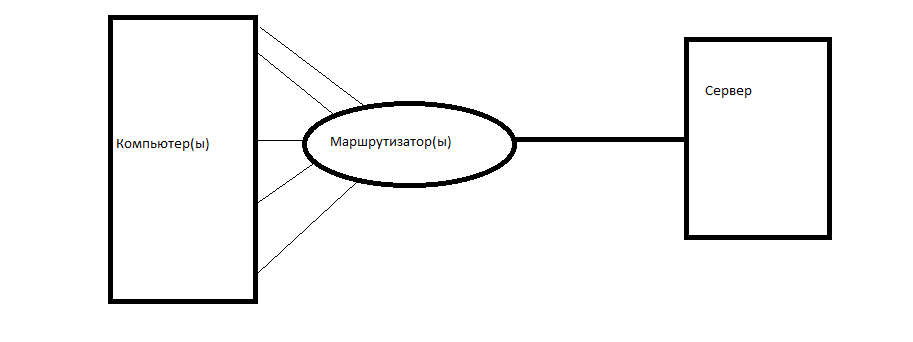

In [2]:
Image("img.png")

В моем случае у нас есть один сервер. У нас есть площадка для сетевого оборудования (там можно разместить несколько маршрутизаторов. Так же у нас помещение с компьютерами, которые равноудалены как от сервера, так и от маршрутизаторов.

In [3]:
cost_optic = 12 # цена оптоволокна за метр
cost_fiber = 30 # цена витой пары за метр
cost_router = 4000 # услованя цена маршрутизатора
router_max_port = 8 # кол-во портов

distance_to_server = 50 # расстояние от компьютеров до сервера
distance_to_router = 10

Мы можем действовать по трем стратегиям: <br>
Все компьютеры подключаем напряму к серверу - функция F1 <br>
Покупаем маршрутизатор только в том случае, если мы способны заполнить все его порты, иначе подключаем компьютеры напрямую - F2 <br>
Подключаем компьютеры исключительно через маршрутизатор - функция F3
<br> 
Попробуем построить наши функции, при условии роста количества компьютеров в сети

In [4]:
hosts_num = np.arange(0, 30, 1) # количество компьютеров в сети

In [5]:
routers_num_0 = hosts_num // router_max_port # покупаем роутер при условии возможности заполнить все порты
routers_num_1 = hosts_num / router_max_port # покупаем роутер сразу же, как только у прошлого заполнилось 8 портов

In [6]:
routers_num_1 = np.array([math.ceil(i) for i in routers_num_1])

In [15]:
len_fiber = distance_to_server * hosts_num
Fx1 = len_fiber*cost_fiber 

hosts_to_server = hosts_num - routers_num_0 * router_max_port
len_fiber_0 = distance_to_server * hosts_to_server + (hosts_num - hosts_to_server)*distance_to_router
len_optic_0 = distance_to_server * routers_num_0
Fx2 = len_fiber_0*cost_fiber + len_optic_0*cost_optic + cost_router*routers_num_0

len_fiber_1 = hosts_num * distance_to_router
len_optic_1 = distance_to_server * routers_num_1
Fx3 = len_fiber_1*cost_fiber + len_optic_1*cost_optic + cost_router*routers_num_1

In [19]:
Fx = np.minimum(Fx2, Fx3)

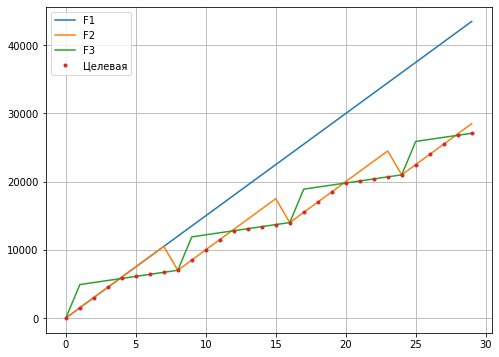

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(Fx1, label='F1')
plt.plot(Fx2, label='F2')
plt.plot(Fx3, label='F3')
plt.plot(Fx, '.',label='Целевая')
plt.legend()
plt.grid()

Из данного случая видно, что покупать дополнительный маршрутизатор измеет смысл, если мы способны заполнить хотя бы 4 порта.